# Read the file

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('C:/Personal/71053934/Documents/SHAHRZAD/Python/Kaggle/Titanic')
df=pd.read_csv('train.csv')

In [2]:
df.shape

(891, 12)

## Set index

In [3]:
df = df.set_index('PassengerId')

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().values.any()

True

## Seperate X and y columns

In [8]:
df.columns[1:]

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [104]:
#df.isnull()
df.shape
y_col = df.columns[0]
X_col = df.columns[1:]
X_df = df[X_col]
y_df = df[y_col]
X_df.shape
y_df.shape
#y_df = pd.DataFrame(data = y_df.values, columns = ['Survived'])
#y_df

#df1 = pd.DataFrame(data=sf.index, columns=['email'])
#df2 = pd.DataFrame(data=sf.values, columns=['list'])

(891,)

## Find corrolated features, with correlation over 0.8

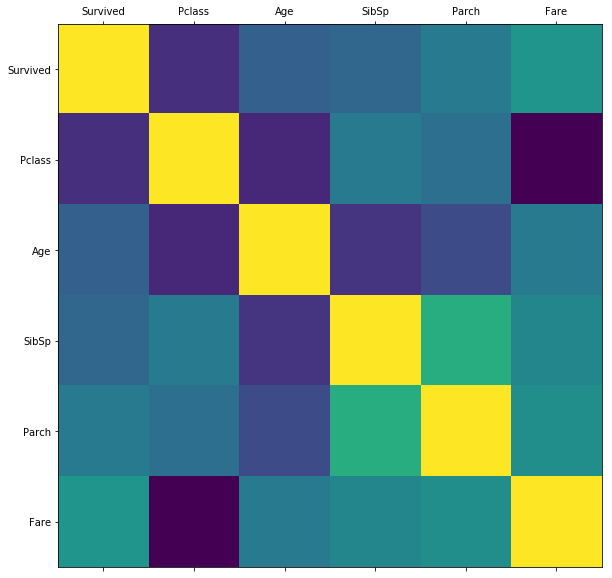

In [118]:
def plot_corr(X_df, size = 10):
    corr = X_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)
plt.show()

In [12]:
X_df_corr = X_df.corr()

In [13]:
X_df.shape

(891, 10)

In [12]:
#X_df_corr[X_df_corr == 1].isnull() == True

In [14]:
X_df_corr = X_df.corr().abs()
high_corr = np.where(X_df_corr > 0.8)
high_corr=[(X_df_corr.columns[x],X_df_corr.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
high_corr

[]

In [16]:
X_df.duplicated().sum()

#X_df.shape

0

In [21]:
columns_drop =['Name', 'Ticket', 'Cabin']
#X_df = X_df.drop(X_df['GarageYrBlt'], axis = 1)
X_df2 = X_df.drop(X_df[columns_drop], axis = 1)
X_df2.shape

(891, 7)

In [22]:
X_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


## Change string features to float

In [24]:

X_df3 = pd.get_dummies(X_df2)
X_df3.shape
#X_df3.head()

(891, 10)

## Fill empty cells

In [25]:
X_df3.isnull().values.any()
X_df3.head()
X_df4 = X_df3.fillna(float())

## Plot the data

C:\Users\71053934\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


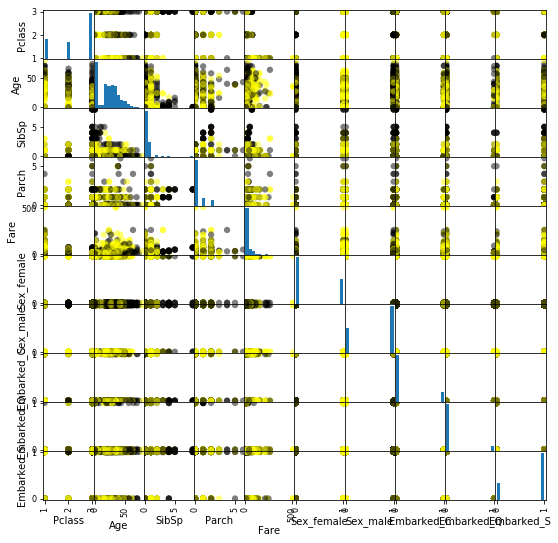

In [106]:
# plotting a scatter matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split

#X = fruits[['height', 'width', 'mass', 'color_score']]
#y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X_df4, y_df, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()

## Classification

In [62]:
from sklearn.linear_model import LogisticRegression


#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
#y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else


#clf = LogisticRegression(C=100).fit(X_train, y_train)
#plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
#                                         None, 'Logistic regression \
#for binary classification\nFruit dataset: Apple vs others',
#                                         subaxes)

# Regression (spliting training set)

In [64]:
percent_survived = len(y_df[y_df['Survived']==1])/len(y_df)*100

#y_df['Survived']== 1
print('Pecent Survived: {:.2f}'.format(percent_survived))
y_df.shape

Pecent Survived: 38.38


(891, 1)

Accuracy: 79.37


C:\Users\71053934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\71053934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


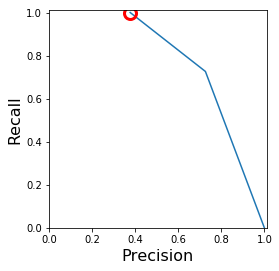

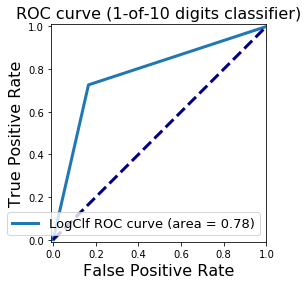

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_df4, y_df, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)

y_test['Survived'].shape

#predicted.shape

Accuracy = len(y_test[y_test['Survived']==predicted])/len(y_test)*100
print('Accuracy: {:.2f}'.format(Accuracy))

precision, recall, thresholds = precision_recall_curve(y_test, predicted)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

#plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

fpr_clf, tpr_clf, _ = roc_curve(y_test, predicted)
roc_auc_lr = auc(fpr_clf, tpr_clf)

#plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='LogClf ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


In [84]:
len(y_test[y_test['Survived'] != predicted])

46

## Read test file

In [91]:
df_test = pd.read_csv('test.csv')

In [94]:
df_test = df_test.set_index('PassengerId')

## Separate X and y columns

In [97]:
#df.isnull()
df_test.shape
#y_col = df.columns[0]
X_df_test = df_test

X_df_test.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Drop columns

In [98]:
columns_drop =['Name', 'Ticket', 'Cabin']
#X_df = X_df.drop(X_df['GarageYrBlt'], axis = 1)
X_df2_test = X_df_test.drop(X_df_test[columns_drop], axis = 1)
X_df2_test.shape

(418, 7)

## Change string features to float

In [99]:

X_df3_test = pd.get_dummies(X_df2_test)
X_df3_test.shape
#X_df3.head()

(418, 10)

## Fill empty cells

In [100]:
X_df3_test.isnull().values.any()
X_df3_test.head()
X_df4_test = X_df3_test.fillna(float())

## Logistic regression

In [112]:

X_train = X_df4
y_train = y_df
X_test = X_df4_test

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)

y_test = pd.DataFrame(data = predicted, columns = ['Survived'])
#y_df = pd.DataFrame(data = y_df.values, columns = ['Survived'])
#y_df
y_test.set_index(X_test.index)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
